In [307]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Regression

## 1.1 Unconstrained


### 1. Multilinear Regression

#### Importing the data
We're importing the data from the lin_regression folder of the DATA PA folder(For me it was the index 21). 
We're also shuffling the data and splitting the data in a 70:30 split of the data.

In [295]:
linearRegData = np.loadtxt("DATA PA/lin_regression/regression_data_021.txt", delimiter=",", skiprows=1)
np.random.shuffle(linearRegData)
trainSplit = linearRegData[0:800, :]
testSplit = linearRegData[800:1000, :]


In [296]:
sensorData = trainSplit[:, 0:10]
sensorData = np.c_[sensorData, np.ones(len(sensorData)).reshape(len(sensorData),1)]
positionData = trainSplit[:, 10:13]
print("SensorData shape : {} and positionData shape: {}".format(sensorData.shape, positionData.shape))

SensorData shape : (800, 11) and positionData shape: (800, 3)


In [297]:
normedSensorData = []
normedPositionData = []
for i in range(len(sensorData)):
    normedSensorData.append(np.linalg.norm(sensorData[i, :]))
    normedPositionData.append(np.linalg.norm(positionData[i, :]))

In [298]:
sensorData.shape

(800, 11)

#### Plotting the graph
We can see a (somewhat) linear trend between the normed sensor data and the normed position data. <br>
We have the feature vector as sensorData and the correspoding position vector as $y_1, y_2, y_3$.<br>
We've need to fit the linear regression as $$\textbf{positionData} = \textbf{SensorData}.\textbf{Weights}  $$ <br>
where: 
* $\textbf{Weights}$ is a matrix of dimentions $(10, 3)$ which are the coefficients that minimises the MSE
* $\textbf{positionData}$ is the matrix of dimention $(700, 3)$ containing the position of the 3D particle
* $\textbf{SensorData}$ is the a matrix of dimention $(700, 10)$ of sensor readings 


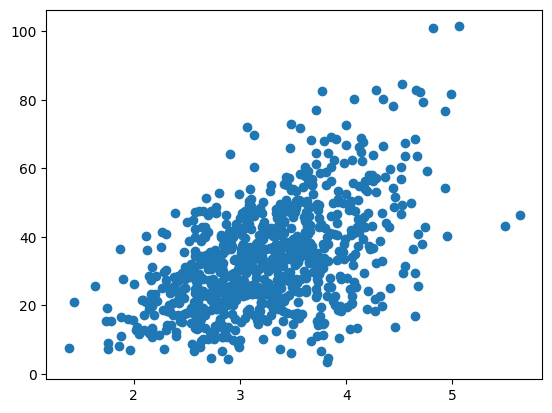

In [308]:
plt.scatter(normedSensorData, normedPositionData)

In [300]:
#Using the least-squares solution to a above linear matrix equation.
weights, residuals, rank, s = np.linalg.lstsq(sensorData, positionData, rcond=None)
def MSE(calculatedData, positionData):
    errorTerms0 = calculatedData[0] - positionData[0]    
    errorTerms1 = calculatedData[1] - positionData[1]    
    errorTerms2 = calculatedData[2] - positionData[2]    
    
    squaredErrors0 = [errorTerms0[i] **2 for i in range(len(errorTerms0))]
    squaredErrors1 = [errorTerms1[i] **2 for i in range(len(errorTerms1))]
    squaredErrors2 = [errorTerms2[i] **2 for i in range(len(errorTerms2))]

    meanSquaredError0 = np.mean(squaredErrors0)
    meanSquaredError1 = np.mean(squaredErrors1)
    meanSquaredError2 = np.mean(squaredErrors2)
    print("Mean Square Error 0 : {}, Mean Square Error 1 : {}, Mean Square Error 2 : {}".format(meanSquaredError0, meanSquaredError1, meanSquaredError2))
    return [meanSquaredError0, meanSquaredError1, meanSquaredError2]
        

In [301]:
calculatedData = sensorData @ weights 
print(MSE(calculatedData, positionData))

Mean Square Error 0 : 0.005058244138920819, Mean Square Error 1 : 0.024165841623452065, Mean Square Error 2 : 0.031652609177235246
[np.float64(0.005058244138920819), np.float64(0.024165841623452065), np.float64(0.031652609177235246)]


### Testing on the test data
We use the test data to measure how well does the linear regression model work on the untrained(Test) data

In [320]:
sensorDataTest = testSplit[:, 0:10]
sensorDataTest = np.c_[sensorDataTest, np.ones(len(sensorDataTest)).reshape(len(sensorDataTest),1)]

positionDataTest = testSplit[:, 10:13]
print("SensorData shape : {} and positionData shape: {}".format(sensorDataTest.shape, positionDataTest.shape))

SensorData shape : (200, 11) and positionData shape: (200, 3)


In [321]:
calculatedDataTest = sensorDataTest @ weights 
print(MSE(calculatedDataTest, positionDataTest))

Mean Square Error 0 : 0.042356128538032674, Mean Square Error 1 : 0.03872993392645829, Mean Square Error 2 : 0.0604095196914694
[np.float64(0.042356128538032674), np.float64(0.03872993392645829), np.float64(0.0604095196914694)]


#### Graphs and metrics
We'll show the performance of the linear regression via the following metrics:
 * Pearson Correlation
 * Mean Squared Error
 * Mean Absolute Error<br>

Along with this we'll check out some correlation graphs for the predicted and the calculated outputs on the test dataset

In [323]:
coverianceMatrix0 = np.cov(calculatedDataTest[:,0], positionDataTest[0])
coverianceMatrix1 = np.cov(calculatedDataTest[1], positionDataTest[1])
coverianceMatrix2 = np.cov(calculatedDataTest[2], positionDataTest[2])

In [385]:
def MAE(calculatedData, positionData):
    errorTerms0 = calculatedData[0] - positionData[0]    
    errorTerms1 = calculatedData[1] - positionData[1]    
    errorTerms2 = calculatedData[2] - positionData[2]    
    
    absoluteErrors0 = [abs(errorTerms0[i]) for i in range(len(errorTerms0))]
    absoluteErrors1 = [abs(errorTerms0[i]) for i in range(len(errorTerms1))]
    absoluteErrors2 = [abs(errorTerms0[i]) for i in range(len(errorTerms2))]

    meanAbsoluteError0 = np.mean(absoluteErrors0)
    meanAbsoluteError1 = np.mean(absoluteErrors1)
    meanAbsoluteError2 = np.mean(absoluteErrors2)
    print("Mean Absolute Error 0 : {}, Mean Absolute Error 1 : {}, Mean Absolute Error 2 : {}".format(meanAbsoluteError0, meanAbsoluteError1, meanAbsoluteError2))
    return [meanAbsoluteError0, meanAbsoluteError1, absoluteErrors2]
        

In [382]:
def pearsonCorrelation(calculatedData, positionData):
    if len(calculatedData) != len(positionData):
        raise ValueError("Vectors calculatedData and positionData must be of the same length")
    
    mean_calculatedData = np.mean(calculatedData)
    mean_positionData = np.mean(positionData)
    
    numerator = np.sum((calculatedData - mean_calculatedData) * (positionData - mean_positionData))
    denominator = np.sqrt(np.sum((calculatedData - mean_calculatedData)**2)) * np.sqrt(np.sum((positionData - mean_positionData)**2))
    if denominator == 0:
        return 0
    
    return numerator / denominator

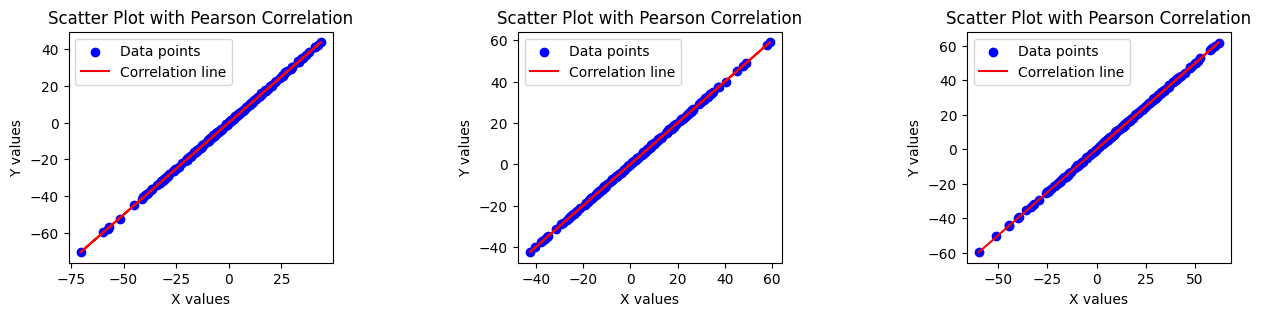

In [387]:
# Calculate Pearson correlation coefficient
def measureMetrics(x, y):
    pearsonCorr = pearsonCorrelation(x, y)
    mse = MSE(x, y)
    mae = MAE(x, y)
    print(" Pearsons correlatoin coefficient is {} \n".format(pearson_correlation))
    print(" Mean Square Error of 1st co-ordinate is {}, 2nd co-ordinate is {}, 3rd co-ordinate is {} \n".format(mse[0], mse[1], mse[2]))
    print(" Mean absolute Error of 1st co-ordinate is {}, 2nd co-ordinate is {}, 3rd co-ordinate is {} \n".format(mae[0], mae[1],mae[2]))

    

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
for i in range(3): 
    x = calculatedDataTest[:,i]
    y = positionDataTest[:,i]
    # axs[i].set_figure(figsize=(3, 3))
    axs[i].scatter(x, y, color="b", label="Data points")
    axs[i].set_title("Scatter Plot with Pearson Correlation")
    axs[i].set_xlabel("X values")
    axs[i].set_ylabel("Y values")
    
    # Calculate and display correlation
    corr = pearsonCorrelation(x, y)
    
    # Optional: Line of best fit
    m, b = np.polyfit(x, y, 1)
    axs[i].plot(x, m * x + b, color="red", label="Correlation line")
    axs[i].legend()
    
plt.subplots_adjust(wspace=0.7)
plt.show()

In [388]:
measureMetrics(calculatedData, positionData)

Mean Square Error 0 : 0.005058244138920819, Mean Square Error 1 : 0.024165841623452065, Mean Square Error 2 : 0.031652609177235246
Mean Absolute Error 0 : 0.0663390986316043, Mean Absolute Error 1 : 0.0663390986316043, Mean Absolute Error 2 : 0.0663390986316043
 Pearsons correlatoin coefficient is <function pearson_correlation at 0x000001CB4B8BE3E0> 

 Mean Square Error of 1st co-ordinate is 0.005058244138920819, 2nd co-ordinate is 0.024165841623452065, 3rd co-ordinate is 0.031652609177235246 

 Mean absolute Error of 1st co-ordinate is 0.0663390986316043, 2nd co-ordinate is 0.0663390986316043, 3rd co-ordinate is [np.float64(0.08913500449936862), np.float64(0.030521641111189934), np.float64(0.07936065028425432)] 



#### Conclusion
We can see that the model performs comparably on the test and the train datasets <br> Thus we conclude that the relationship between the SensorData and the Particle position data are linear and given by  $$\textbf{positionData} = \textbf{SensorData}.\textbf{Weights}$$
where $\textbf{Weights}$ is a matrix of dimentions $(10, 3)$ which are the coefficients that minimises the MSE


### 2. Generalised Regression with polynomial kernel

#### Importing the data
We're importing the data from the lin_regression folder of the DATA PA folder(For me it was the index 21). 
We're also shuffling the data and splitting the data in a 70:30 split of the data and then fitting the regression model

In [189]:
polyLinearRegData = np.loadtxt("DATA PA/poly_regression/poly_regression_data_021.txt", delimiter=",", skiprows=1)
np.random.shuffle(polyLinearRegData)
trainSplit = polyLinearRegData[0:800, :]
testSplit = polyLinearRegData[800:1000, :]

In [190]:
sensorData = trainSplit[:, 0:2]
positionData = trainSplit[:, 2:5]
print("SensorData shape : {} and positionData shape: {}".format(sensorData.shape, positionData.shape))

SensorData shape : (800, 2) and positionData shape: (800, 3)


In [191]:
#Code to generate the polynomial terms of nth degree
def feature_degree(feature, degree):
    feature_powered = [pow(i, degree) for i in feature]
    return feature_powered

def feature_product(feature1, degree1, feature2, degree2) :
    feature_powered1 = feature_degree(feature1, degree1)
    feature_powered2 = feature_degree(feature2, degree2)
    if len(feature_powered1) == len(feature_powered2): 
        productFeatureVector = [feature_powered1[i] * feature_powered2[i] for i in range(len(feature_powered1))]
        return productFeatureVector
    else:
        raise ValueError("Feature vectors must be of the same length.")
    
def degreePolynomial(feature1, feature2, degree):
    list = []
    for i in range(degree+1):
        list.append(feature_product(feature1, i, feature2, degree-i))
    return list

def completeDegreePolynomial(feature1, feature2, degree):
    list = []
    for i in range(degree+1):
        degreeList = degreePolynomial(feature1, feature2, i)
        for i in range(len(degreeList)):
            list.append(degreeList[i])
        
    return np.array(list).T


##### Preparing the model for polynomial kernels 
Given the polynomial kernels(polynomial terms), we'll like to perform regression on the polynomial terms.<br> We'll first look for the the degree 1 polynomial kernel

In [208]:
feature1 = sensorData[:,0]
feature2 = sensorData[:,1]

#Generating the feature kernel for degree 1
polynomialKernel = completeDegreePolynomial(feature1, feature2, 1)
weights, residuals, rank, s = np.linalg.lstsq(polynomialKernel, positionData, rcond=None)


In [209]:
polynomialKernel.shape

(200, 3)

In [210]:
calculatedData = polynomialKernel @ weights 
print(MSE(calculatedData, positionData))

Mean Square Error 0 : 0.6138261369097016, Mean Square Error 1 : 1.3191992612388241, Mean Square Error 2 : 0.2982203940718698
[np.float64(0.6138261369097016), np.float64(1.3191992612388241), np.float64(0.2982203940718698)]


In [211]:
weights.shape

(3, 3)

### Testing on the test data
We use the test data to measure how well does the linear regression model work on the untrained(Test) data

In [212]:
sensorDataTest = testSplit[:, 0:2]
positionDataTest = testSplit[:, 2:5]
print("SensorDataTest shape : {} and positionDataTest shape: {}".format(sensorData.shape, positionData.shape))

SensorDataTest shape : (200, 2) and positionDataTest shape: (200, 3)


In [213]:
feature1Test = sensorDataTest[:,0]
feature2Test = sensorDataTest[:,1]

#Generating the feature kernel for degree 1
polynomialKernelTest = completeDegreePolynomial(feature1, feature2, 1)
calculatedDataTest = polynomialKernelTest @ weights 
print(MSE(calculatedDataTest, positionDataTest))

Mean Square Error 0 : 0.6138261369097016, Mean Square Error 1 : 1.3191992612388241, Mean Square Error 2 : 0.2982203940718698
[np.float64(0.6138261369097016), np.float64(1.3191992612388241), np.float64(0.2982203940718698)]
